# Probability Distributions and the Central Limit Theorem

In [9]:
%matplotlib inline

from __future__ import division

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
from IPython.display import IFrame
IFrame('https://en.wikipedia.org/wiki/Type_I_and_type_II_errors', width = 800, height=400)

## Discrete Distributions
**BINOMIAL**: The probability of observing n successes, each with probability p, out of N attemts.

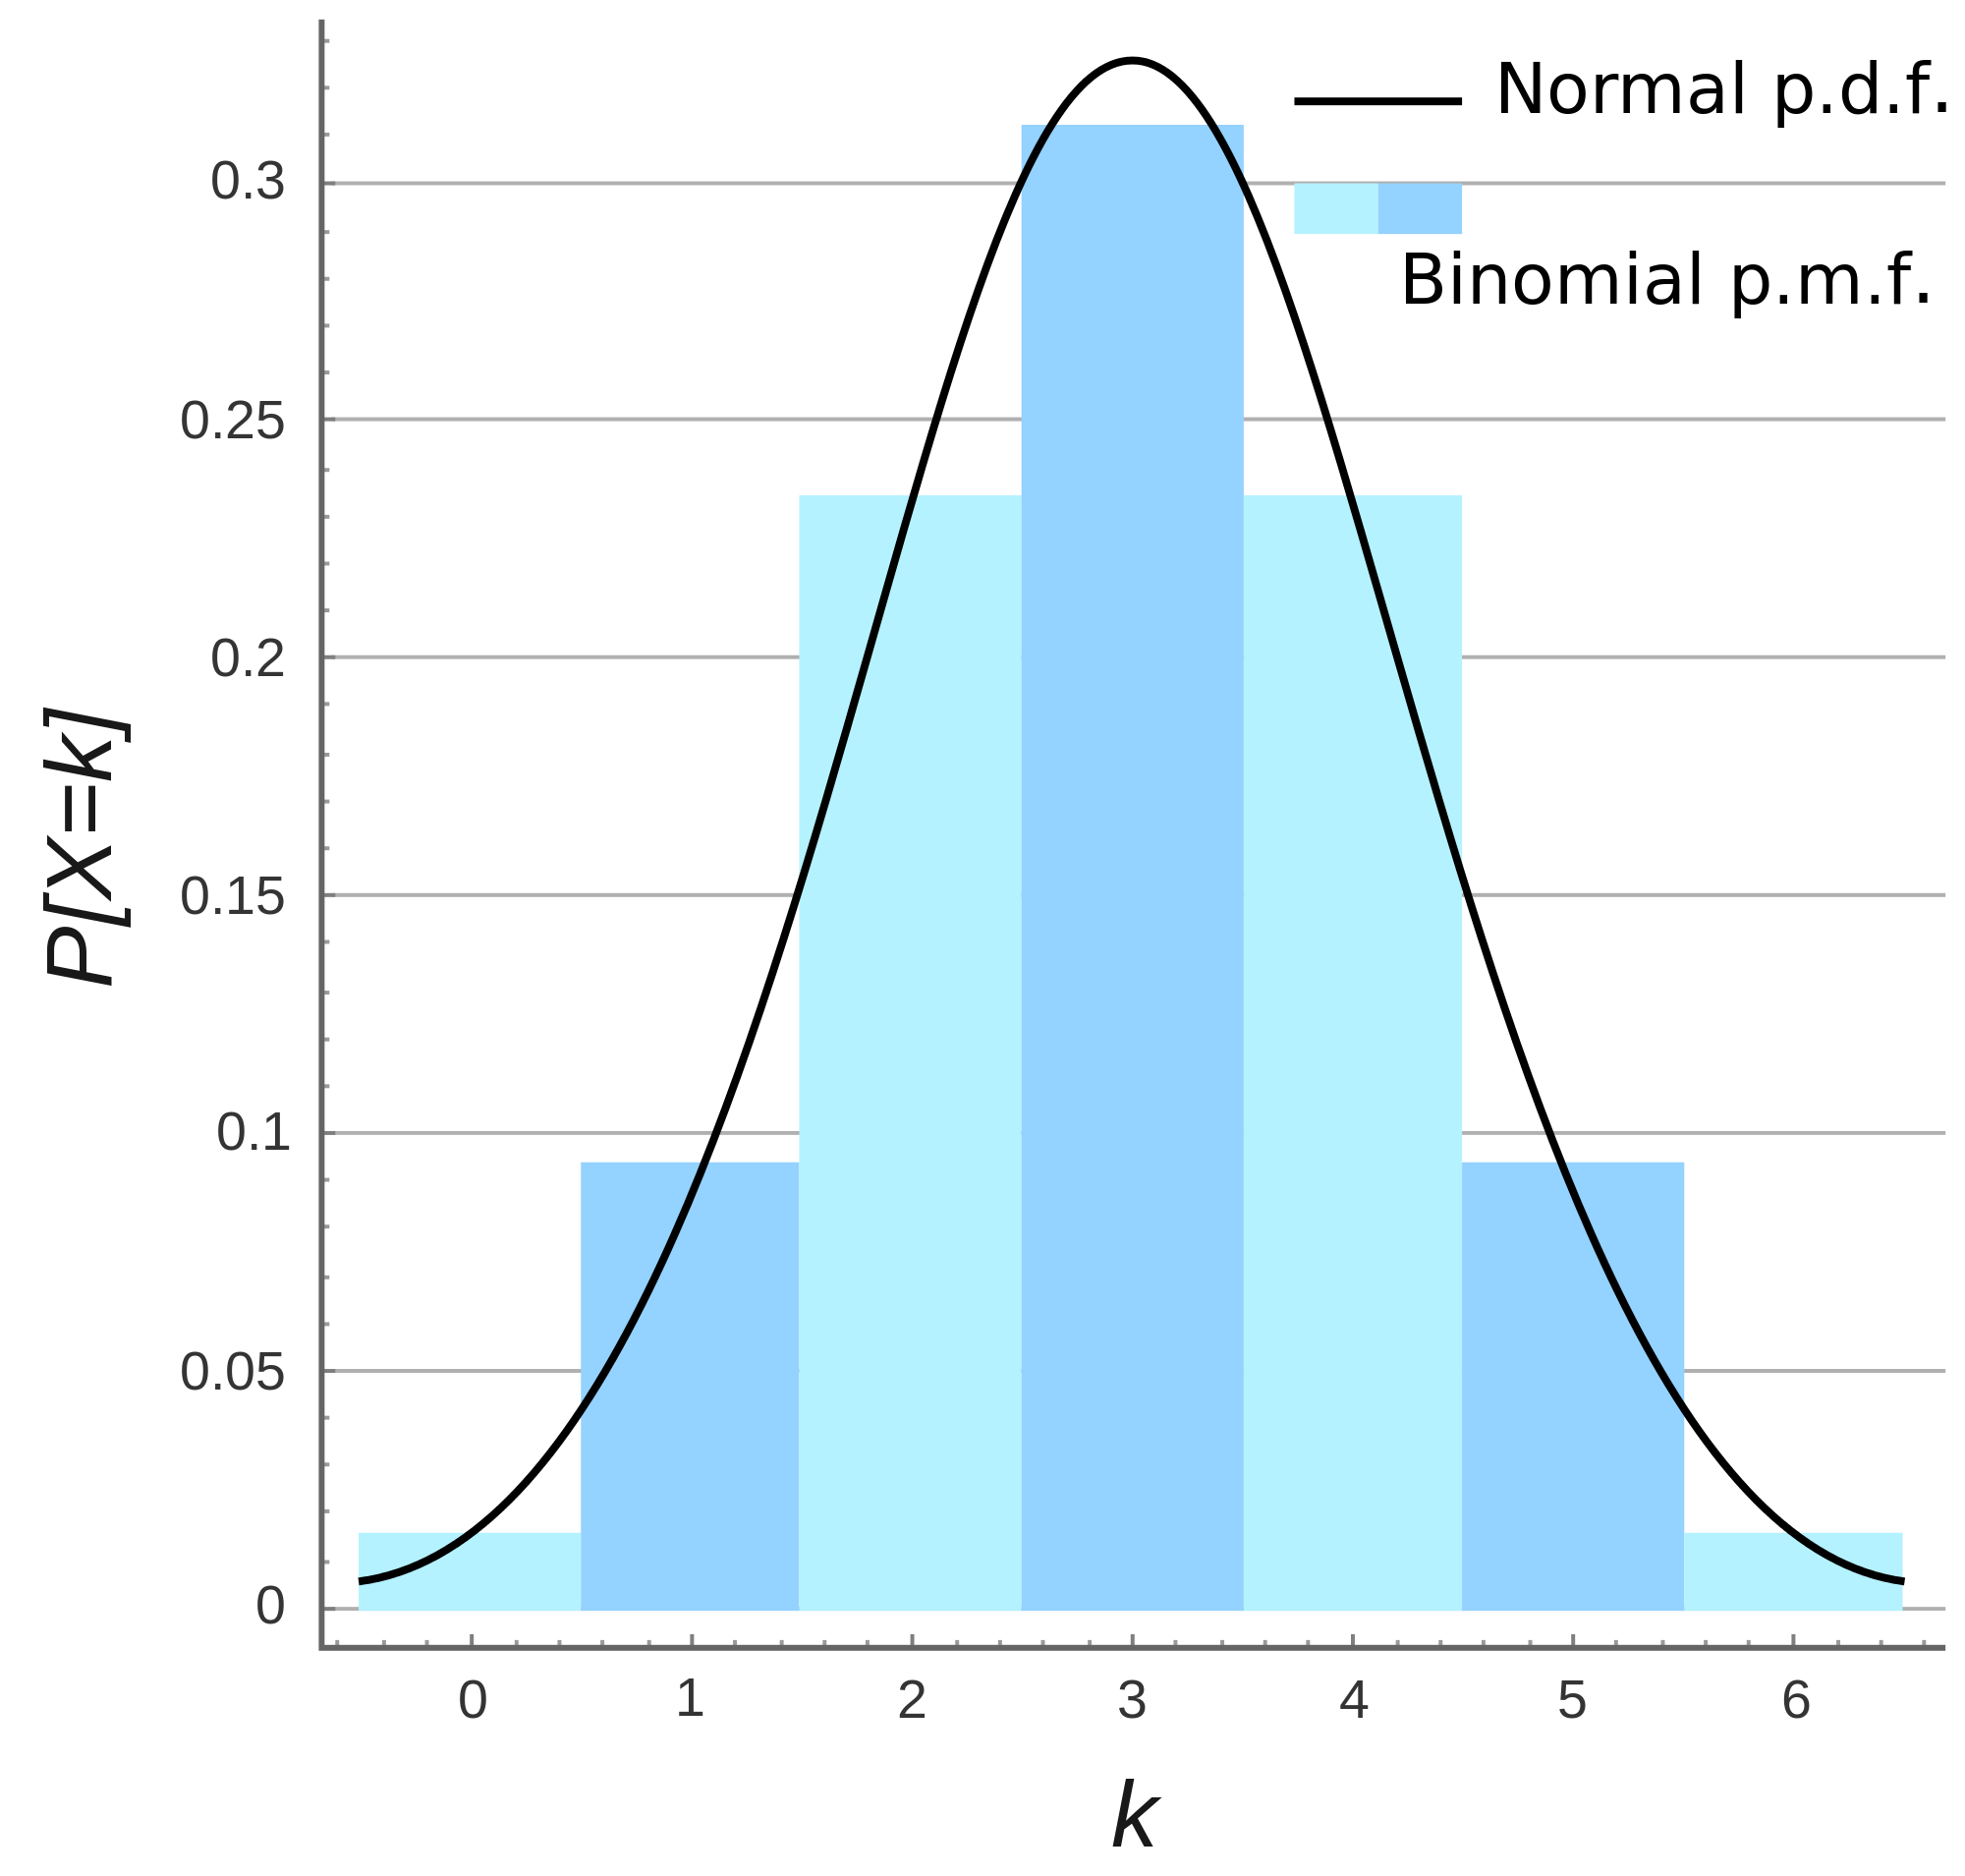

In [19]:
from IPython.display import Image
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Binomial_Distribution.svg/2000px-Binomial_Distribution.svg.png',
     width = 800, height=200)

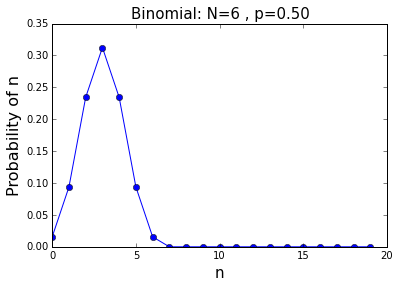

In [3]:
N = 6
p = 0.5
n = arange(0,20)
y = stats.binom.pmf(n,N,p)
plt.plot(n,y,'-o')
plt.title('Binomial: N=%i , p=%.2f' % (N,p), fontsize = 15)
plt.xlabel('n', fontsize=15)
plt.ylabel('Probability of n', fontsize = 16)

** SIMULATION**

Mean: 3.0117
SD: 1.45436


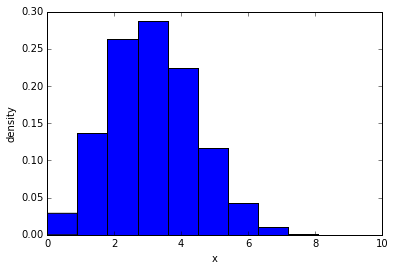

In [12]:
binom_sim = stats.binom.rvs( n = 10, p = 0.3, size = 10000)
print "Mean: %g" % np.mean(binom_sim)
print "SD: %g" % np.std(binom_sim, ddof=1)
plt.hist(binom_sim, bins = 10, normed = True)
plt.xlabel("x")
plt.ylabel("density")

**POISSON**

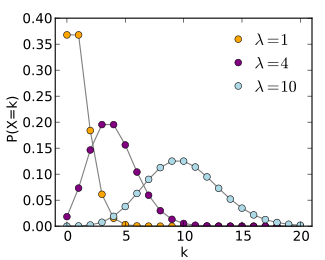

In [22]:
from IPython.display import Image
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Poisson_pmf.svg/325px-Poisson_pmf.svg.png',
     width = 600, height=100)

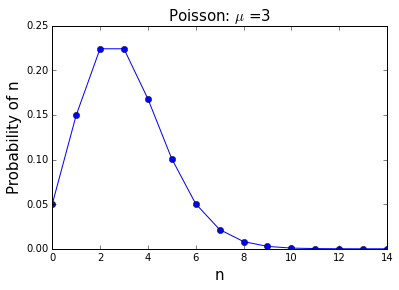

In [6]:
u = 3
n = arange(0, 15)
y = stats.poisson.pmf(n,u)
plt.plot(n,y,'-o')
plt.title('Poisson: $\mu$ =%i' % u, fontsize = 15)
plt.xlabel('n', fontsize = 15)
plt.ylabel('Probability of n', fontsize=15)

## Continuous Distributions

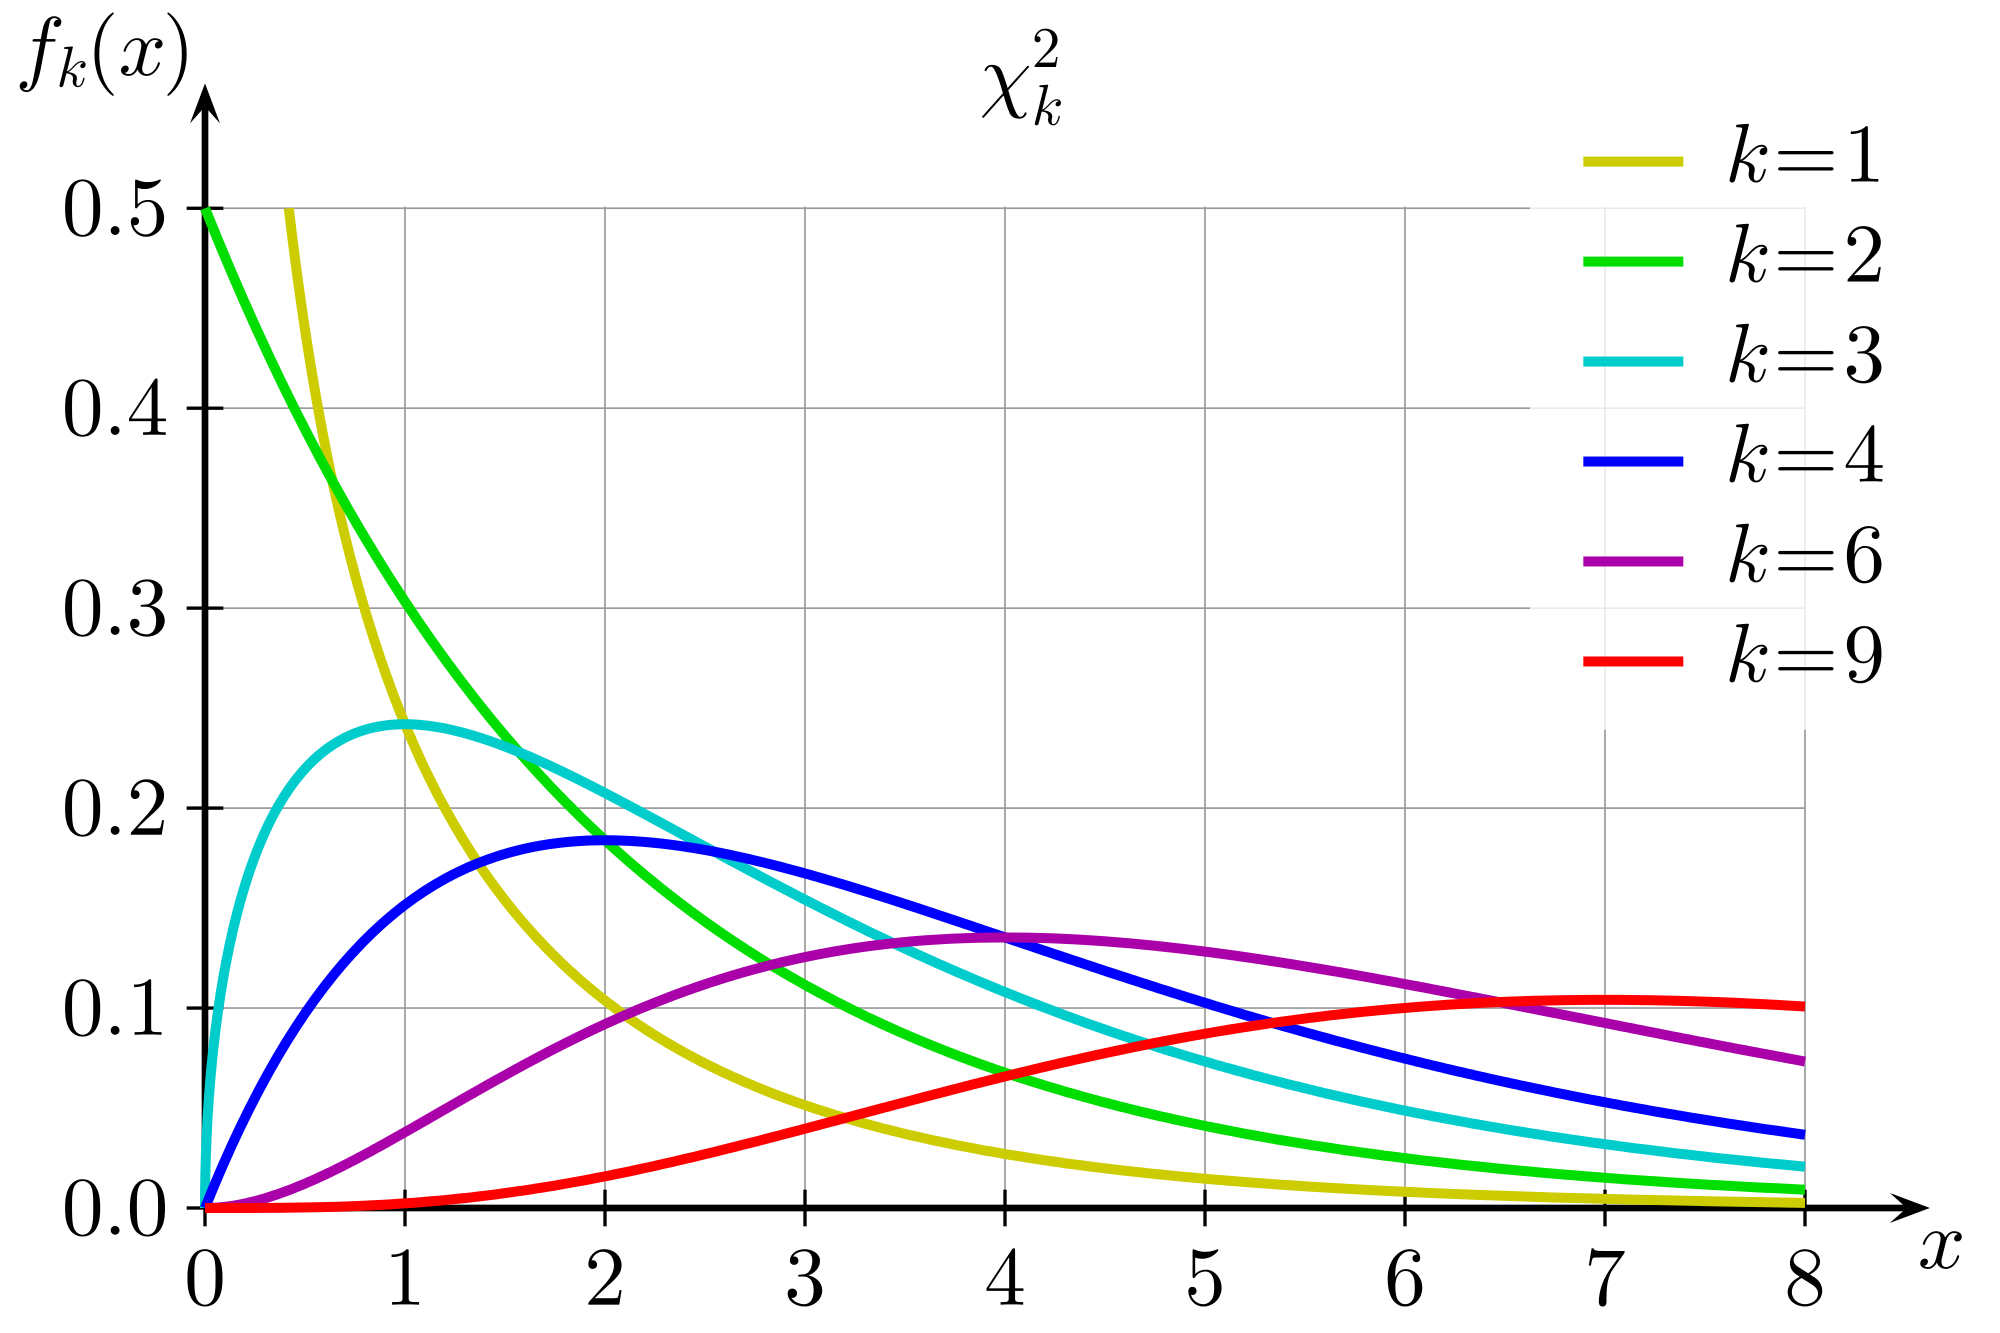

In [20]:
from IPython.display import Image
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/3/35/Chi-square_pdf.svg/2000px-Chi-square_pdf.svg.png',
     width = 800, height=200)

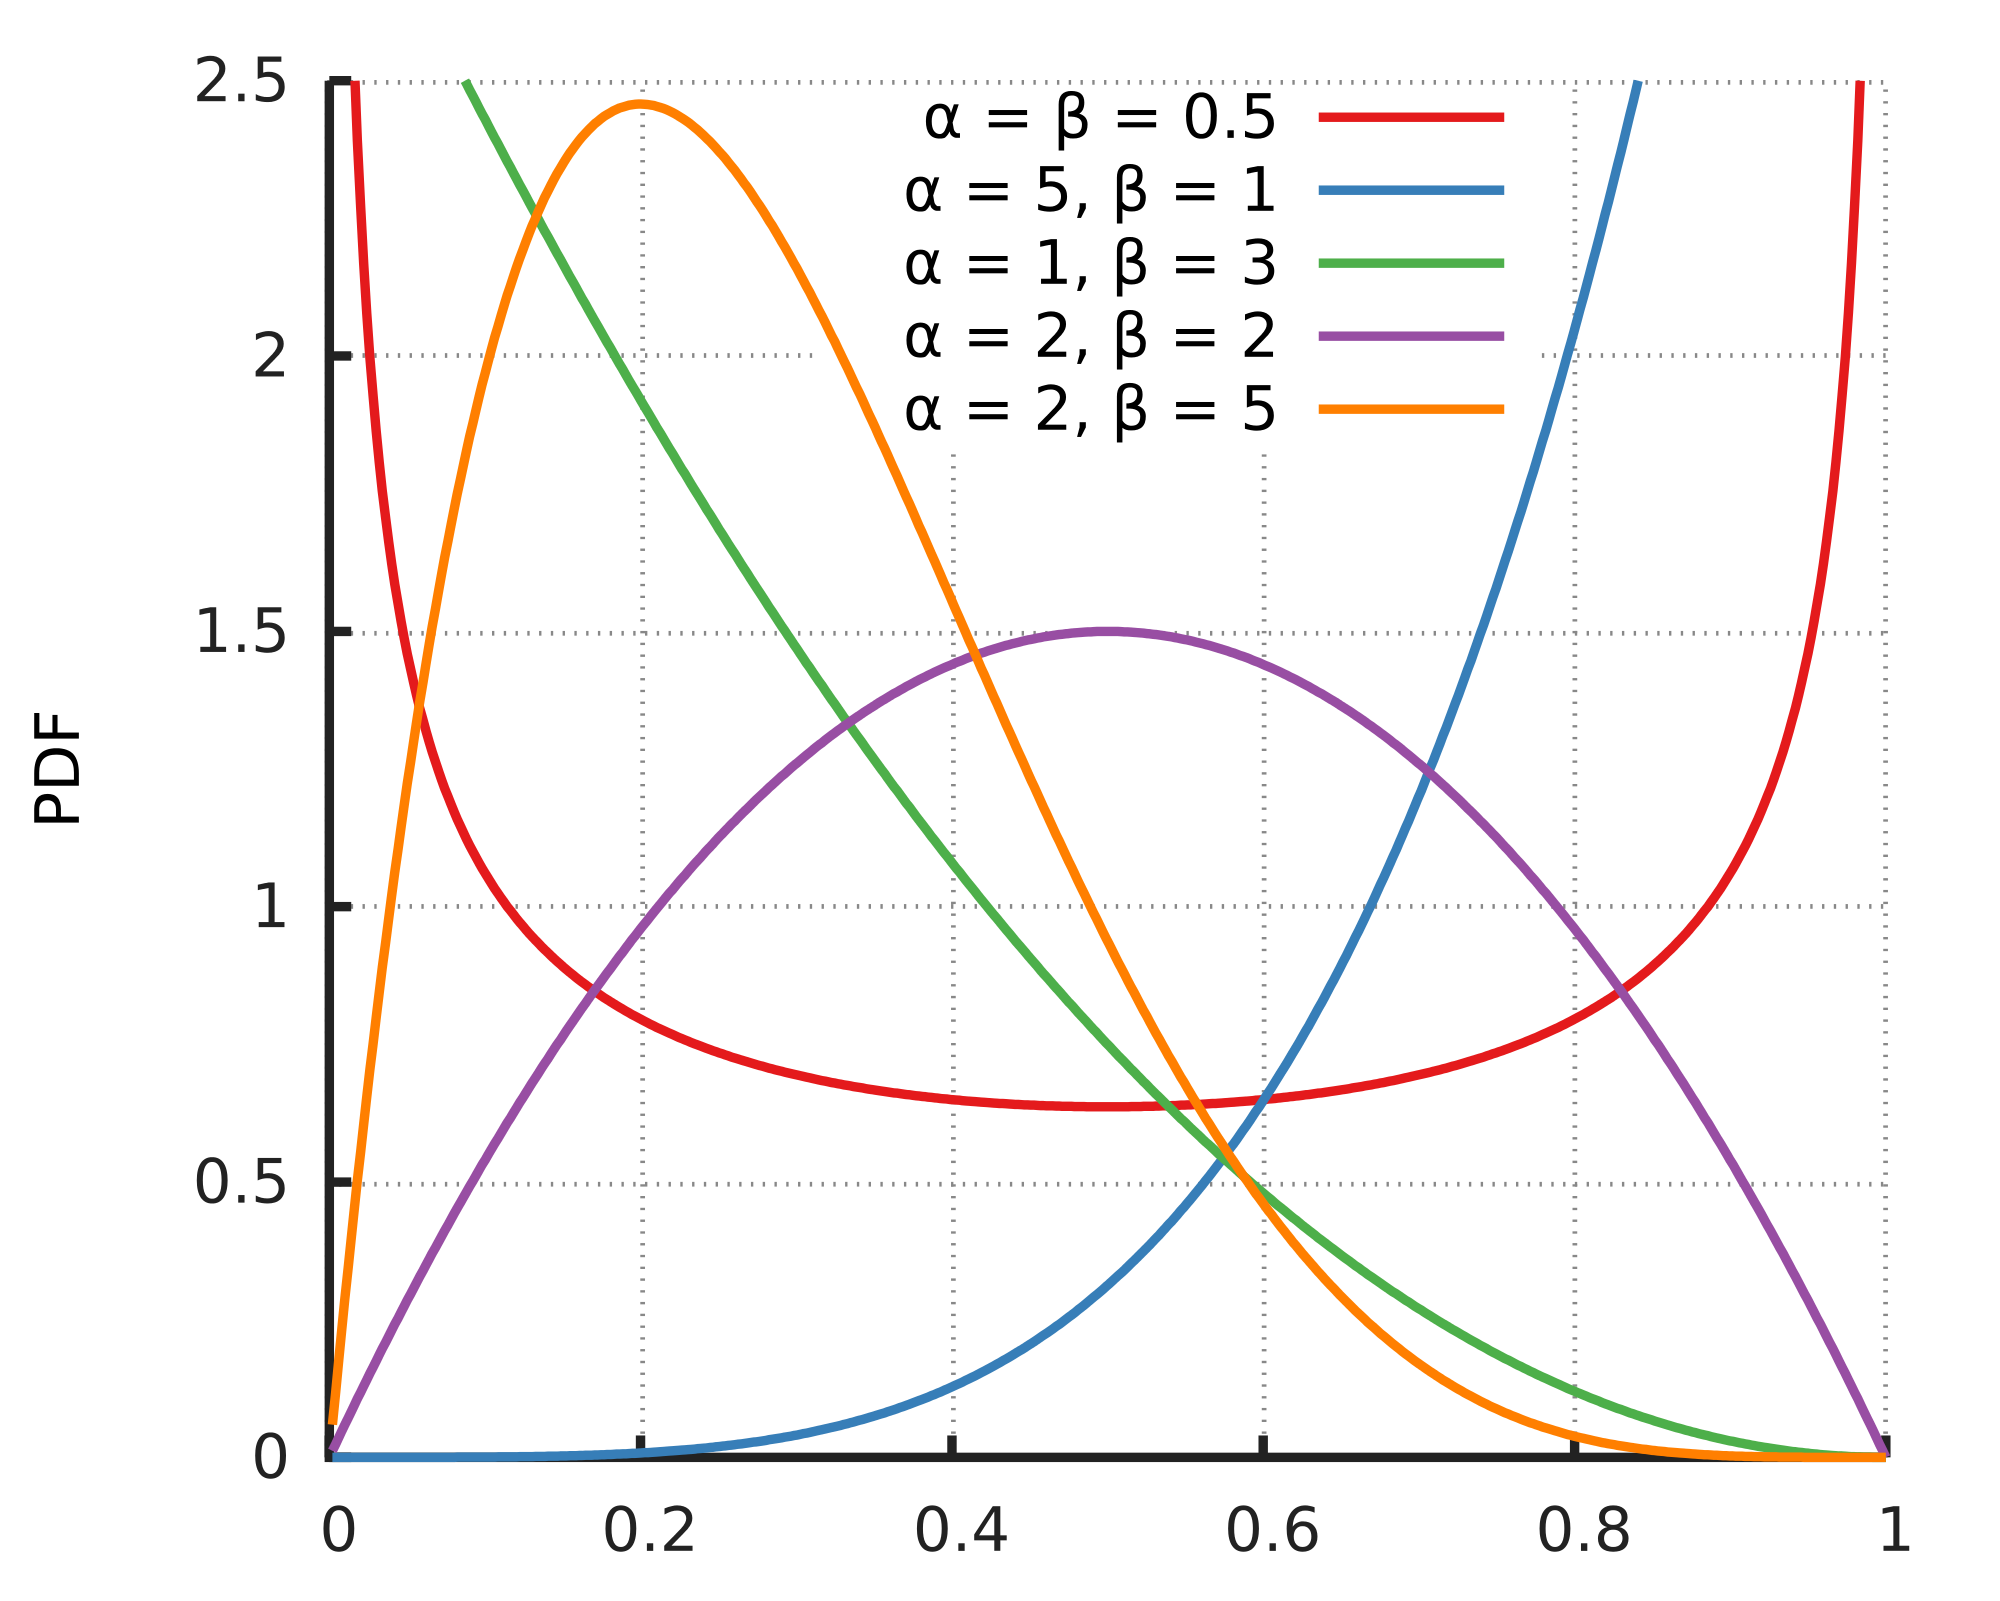

In [31]:
from IPython.display import Image
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Beta_distribution_pdf.svg/2000px-Beta_distribution_pdf.svg.png',
     width = 800, height=200)

**GAUSSIAN (NORMAL)**

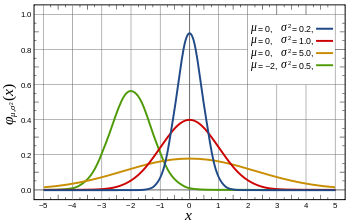

In [24]:
from IPython.display import Image
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/350px-Normal_Distribution_PDF.svg.png',
     width = 600, height=150)

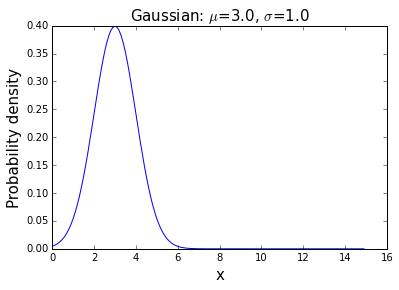

In [9]:
y = 5 # mean
s = 1 # standard deviation
x = arange(0, 15, 0.1)
y = (1/(np.sqrt(2*np.pi*s*s)))*exp(-(((x-u)**2)/(2*s*s)))
plt.plot(x,y,'-')
plt.title('Gaussian: $\mu$=%.1f, $\sigma$=%.1f' % (u,s), fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('Probability density', fontsize = 15)

## T-student distribution

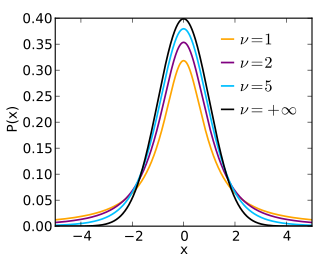

In [47]:
from IPython.display import Image
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Student_t_pdf.svg/325px-Student_t_pdf.svg.png',
     width = 600, height=150)

**EXPONENTIAL**

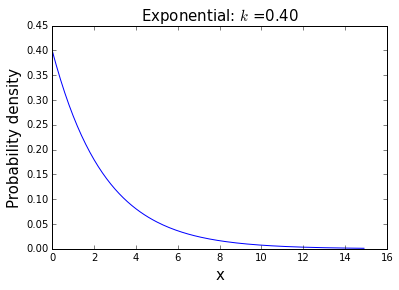

In [10]:
k = 0.4
x = arange(0,15,0.1)
y=k*exp(-k*x)
plt.plot(x,y,'-')
plt.title('Exponential: $k$ =%.2f' % k, fontsize = 15)
plt.xlabel('x', fontsize = 15)
plt.ylabel('Probability density', fontsize=15)

**BETA**

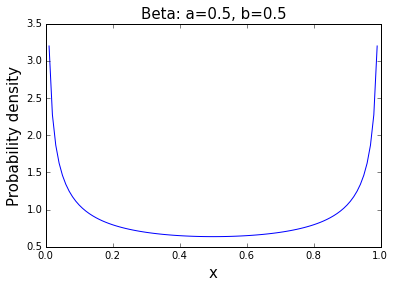

In [11]:
a = 0.5
b = 0.5
x = arange(0.01,1,0.01)
y = stats.beta.pdf(x,a,b)
plt.plot(x,y,'-')
plt.title('Beta: a=%.1f, b=%.1f' % (a,b), fontsize = 15)
plt.xlabel('x', fontsize = 15)
plt.ylabel('Probability density', fontsize = 15)

### Pearson Chi-Squared Test for goodness of fit

Reference: http://connor-johnson.com/2014/12/31/the-pearson-chi-squared-test-with-python-and-r/

It determines how well categorical variables fit some distribution. We assume that the categories are mutually exclusive, and completely cover the sample space. With this statistic we calculate the p-value, which represents the probability of a more exreme or more unlikely result occurring if this experiment were repeated many times.

Usually, for situations like this, when we have N categories, we will assume that the degrees of freedom, u, is u=N-1. When we have a table instead of a list of counts, then the formula is u=nrows-1 * ncols-1, where nrows is the number of rows in the table, and ncols is the number of columns.

What's a good cutoff for p-values to know whether we should trust the effect size we're seeing? Two popular values are .05 or .01: if there is less than a 5% or 1% chance that we arrived at our answer by chance, we're willing to say that we have a statistically significant result.

#### Dice Example

In [5]:
import scipy.stats

black = [9,10,12,11,8,10]
red = [6,5,14,15,11,9]
fail = [1,1,2,4,1,1]

chi2, p = scipy.stats.chisquare(black)
msg = "Test Statistic: {}\np-value: {}"
print( msg.format( chi2, p ) )

Test Statistic: 1.0
p-value: 0.962565773247


In [6]:
# Now, doing explicit the expected distribution
expected_counts = [10,10,10,10,10,10]
 
chi2, p = scipy.stats.chisquare(red, f_exp=expected_counts)
msg = "Test Statistic: {}\np-value: {}"
print( msg.format( chi2, p ) )

Test Statistic: 8.4
p-value: 0.135525223378


In [7]:
# Now, doing explicit the expected distribution
expected_counts = [10,10,10,10,10,10]
 
chi2, p = scipy.stats.chisquare(fail, f_exp=expected_counts)
msg = "Test Statistic: {}\np-value: {}"
print( msg.format( chi2, p ) )

Test Statistic: 42.4
p-value: 4.88850378456e-08


#### Contingency table

In [50]:
house = [ [ 215, 143 ], [ 19, 64 ] ]
chi2, p, ddof, expected = scipy.stats.chi2_contingency( house )
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

Test Statistic: 35.8877686481
p-value: 2.09016744218e-09
Degrees of Freedom: 1

[[ 189.95918367  168.04081633]
 [  44.04081633   38.95918367]]


## Normal distribution test

Referene: https://dataiap.github.io/dataiap/day3/hypothesis_testing.html

T-Tests are resilient to breaking of the normality assumption, and, if you're really serious about your statistics, there are nonparametric equivalents that don't make normality assumptions. They are more conservative since they can't make assumptions about the data, and thus likely require a larger sample size to reach significance.

In [11]:
import scipy.stats

town1_heights = [5, 6, 7, 6, 7.1, 6, 4]
town2_heights = [5.5, 6.5, 7, 6, 7.1, 6]

print "Town 1 Shapiro-Wilks p-value", scipy.stats.shapiro(town1_heights)[1]
print "Town 2 Shapiro-Wilks p-value", scipy.stats.shapiro(town2_heights)[1]

 Town 1 Shapiro-Wilks p-value 0.380458295345
Town 2 Shapiro-Wilks p-value 0.562481462955


**Seeing the above results, we can't reject the Normal distribution assumption**

If you're alright with that, feel free to run the Mann-Whitney U nonparametric version of the T-Test, which has a wonderful name.

#### Test assumming Normal distribution

In [12]:
print "T-test (unpaired) p-value", stats.ttest_ind(town1_heights, town2_heights)[1]
print "statistic ", stats.ttest_ind(town1_heights, town2_heights)[0]

T-test (unpaired) p-value 0.363808734752
statistic  -0.947347987132


#### Test assumming Non-Normal distribution

In [56]:
import scipy.stats

print "Mann-Whitney U p-value", scipy.stats.mannwhitneyu(town1_heights, town2_heights)[1]

Mann-Whitney U p-value 0.253597522173


## Playing with data

In [42]:
data = pd.read_csv('brain_size.csv', sep=';', na_values = '.')
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545


In [43]:
data.describe()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,40.000000
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,908755.000000
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,72282.048931
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,790619.000000
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,855918.500000
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,905399.000000
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,950078.000000
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1079549.000000


In [7]:
t = np.linspace(-6,6,20)
sin_t = np.sin(t)
cos_t = np.cos(t)
pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t}).head()

,cos,sin,t
0,0.960170,0.279415,-6.000000
1,0.609977,0.792419,-5.368421
2,0.024451,0.999701,-4.736842
3,-0.570509,0.821291,-4.105263
4,-0.945363,0.326021,-3.473684


In [8]:
data.shape

(40, 8)

In [9]:
data.columns

Index([u'Unnamed: 0', u'Gender', u'FSIQ', u'VIQ', u'PIQ', u'Weight', u'Height',
       u'MRI_Count'],
      dtype='object')

In [11]:
print(data['Gender'][:10])

0    Female
1      Male
2      Male
3      Male
4    Female
5    Female
6    Female
7    Female
8      Male
9      Male
Name: Gender, dtype: object


In [12]:
data[data["Gender"] == "Female"]['VIQ'].mean()

109.45

In [13]:
groupby_gender = data.groupby("Gender")
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


### Plotting data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d565c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e86a0d0>]], dtype=object)

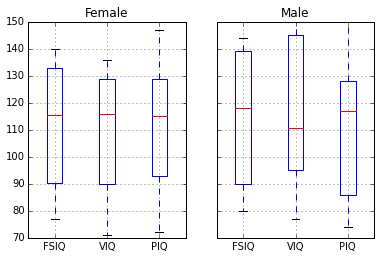

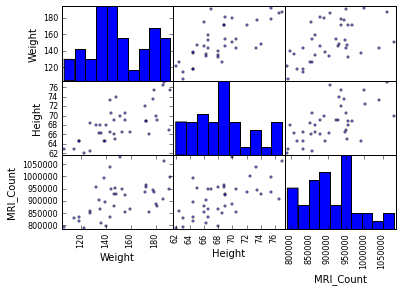

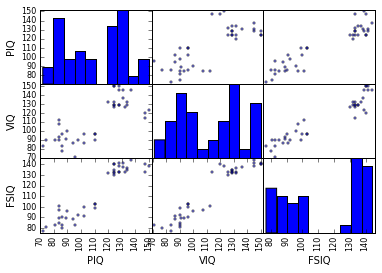

In [46]:
groupby_gender = data.groupby('Gender')
groupby_gender.boxplot(column=["FSIQ","VIQ","PIQ"])

plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
# The IQ metrics are bimodal, as if there are 2 sub-populations
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

### Hypothesis testing: comparing two groups


**T-test assume Gaussian errors (Normal distribution)**.

In [ ]:
from scipy import stats

### 1-sample t-test: testing the value of a population mean

**scipy.stats.ttest_1samp** tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value.

In [17]:
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

 With a p-value of 10^-28 we can claim that the population mean for the IQ (VIQ measure) is not 0.

### 2-sample t-test: testing the value of a population mean

In [20]:
female_viq = data[data['Gender'] == "Female"]["VIQ"]
male_viq = data[data['Gender'] == "Male"]["VIQ"]
stats.ttest_ind(female_viq, male_viq)

Ttest_indResult(statistic=-0.77261617232750113, pvalue=0.44452876778583217)

### Paired-tests: repeated masurements on the same individuals

In [23]:
# Forgetting the links between observations: Optimistic p-value
stats.ttest_ind(data['FSIQ'], data['PIQ'])

Ttest_indResult(statistic=0.46563759638096403, pvalue=0.64277250094148408)

In [24]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

In [25]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

Wilcox signed-rank test

In [26]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

## Linear models, multiple factors and analysis of variance

In [28]:
# Fit a linear model, using ordinaly least squeares
x = np.linspace(-5,5,20)
np.random.seed(1)
# normal distribution noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
data = pd.DataFrame({'x': x, 'y':y})

In [29]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

In [30]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Sun, 22 Nov 2015   Prob (F-statistic):           8.56e-08
Time:                        15:34:20   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

## Playing with parasite data

In [6]:
experimentDF = pd.read_csv('https://raw.githubusercontent.com/rhiever/ipython-notebook-workshop/master/parasite_data.csv',
                  na_values = [" "])

In [7]:
experimentDF.head()

,Virulence,Replicate,ShannonDiversity
0,0.5,1,0.059262
1,0.5,2,1.093600
2,0.5,3,1.139390
3,0.5,4,0.547651
4,0.5,5,0.065928


In [8]:
treatment1 = experimentDF[experimentDF["Virulence"] == 0.5]["ShannonDiversity"]
treatment2 = experimentDF[experimentDF["Virulence"] == 0.8]["ShannonDiversity"]

### Mann-Whitney-Wilcoxon (MWW) RankSum test
The MWW RankSum test is a useful test to determine if two distributions are significantly different or not. Unlike the t-test, the RankSum test does not assume that the data are normally distributed, potentially providing a more accurate assessment of the data set

In [43]:
from scipy import stats

z_stat, p_val = stats.ranksums(treatment1, treatment2)
print "MWW RankSum P for treatments 1 and 2 =", p_val

MWW RankSum P for treatments 1 and 2 = 0.000983355902735


If P <= 0.05, we are highly confident that the distributions significantly differ, and can claim that treatments had a significant impact on the measured value. On the other hand, if the treatments do not significantly differ, we could expect a result such as the following:

In [46]:
treatment_3 = experimentDF[experimentDF["Virulence"] == 0.8]["ShannonDiversity"]
treatment_4 = experimentDF[experimentDF["Virulence"] == 0.9]["ShannonDiversity"]

z_stat, p_val = stats.ranksums(treatment_3, treatment_4)
print "MWW RankSum P for treatments 1 and 2 =", p_val

MWW RankSum P for treatments 1 and 2 = 0.994499571124


### One-way analysis of variance (ANOVA)

If you need to compare more than two data sets at a time, an ANOVA is the best bet.

In [9]:
treatment_1 = experimentDF[experimentDF["Virulence"] == 0.7]["ShannonDiversity"]
treatment_2 = experimentDF[experimentDF["Virulence"] == 0.8]["ShannonDiversity"]
treatment_3 = experimentDF[experimentDF["Virulence"] == 0.9]["ShannonDiversity"]

In [48]:
from scipy import stats

f_val, p_val = stats.f_oneway(treatment_1, treatment_2, treatment_3)
print "One-way ANOVA p=", p_val

One-way ANOVA p= 0.381509481874


If P > 0.05, we can claim with high confidence that the means of the results of all three experiments are not significantly different.

### Bootstrapped 95% confidence intervals
Oftentimes in wet lab research, it's difficult to perform the 20 replicate runs recommended for computing reliable confidence intervals with SEM.
In this case, bootstrapping the confidence intervals is a much more accurate method of determining the 95% confidence interval around your experiment's mean performance.

In [15]:
import scipy
import scikits.bootstrap as bootstrap

CIs = bootstrap.ci(data=treatment1, statfunction=scipy.mean, alpha = 0.1)

print "Bootstrapped 95% confidence intervals\nLow:", CIs[0], "\nHigh:", CIs[1], "\nMean:", scipy.mean(treatment1)

Bootstrapped 95% confidence intervals
Low: 0.5938620648 
High: 0.905994178 
Mean: 0.7419197774


## Kernel Density Estimation

Reference: http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/kernel_density.html

In [25]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.distributions.mixture_rvs import mixture_rvs

A univariate example

In [27]:
np.random.seed(12345)
obs_dist1 = mixture_rvs([.25,.75], size = 100000, dist = [stats.norm, stats.norm],
                       kwargs=(dict(loc=-1, scale=.5), dict(loc=1,scale=.5)))

In [28]:
kde = sm.nonparametric.KDEUnivariate(obs_dist1)
kde.fit()

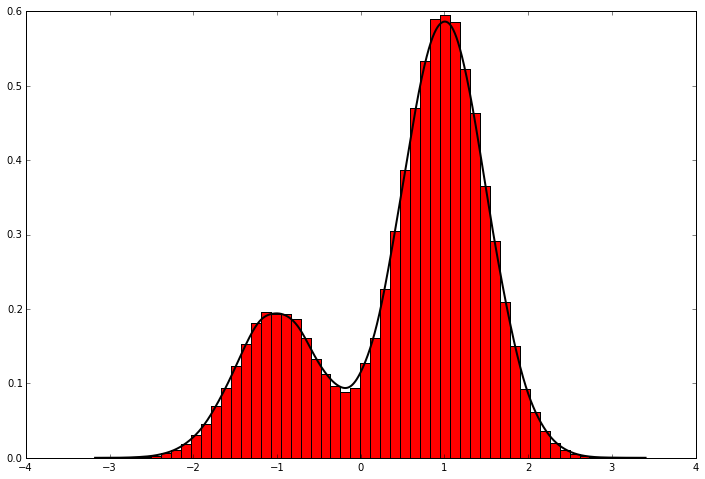

In [29]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.hist(obs_dist1, bins = 50, normed = True, color = 'red')
ax.plot(kde.support, kde.density, lw = 2, color = 'black')

In [35]:
print kde.entropy
print kde.evaluate(-1)

1.25261197054
[ 0.1941107]


In [32]:
obs_dist2 = mixture_rvs([.25,.75], size=10000, dist=[stats.norm, stats.beta],
            kwargs = (dict(loc=-1,scale=.5),dict(loc=1,scale=1,args=(1,.5))))

kde2 = sm.nonparametric.KDEUnivariate(obs_dist2)
kde2.fit()

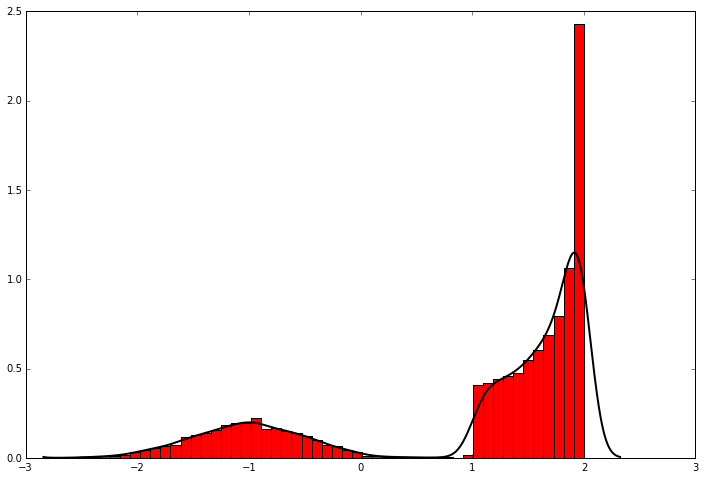

In [33]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.hist(obs_dist2, bins=50, normed=True, color='red')
ax.plot(kde2.support, kde2.density, lw=2, color='black');